# Practice notebook for univariate analysis using NHANES data

This notebook will give you the opportunity to perform some univariate analyses on your own using the NHANES.  These analyses are similar to what was done in the week 2 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("nhanes_2015_2016.csv")
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


## Question 1

Relabel the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to have brief but informative character labels.  Then construct a frequency table of these values for all people, then for women only, and for men only.  Then construct these three frequency tables using only people whose age is between 30 and 40.

In [2]:
da["Marital_Status"] = da.DMDMARTL.replace({1.0:"Married",2.0:"Widowed",3.0:"Divorced",4.0:"Separated",
                                            5.0:"Never Married",6.0:"Living with Partner",77:"Refused",
                                            9:"Don't know"}).fillna("Missing")
da["Marital_Status"].value_counts()

Married                2780
Never Married          1004
Divorced                579
Living with Partner     527
Widowed                 396
Missing                 261
Separated               186
Refused                   2
Name: Marital_Status, dtype: int64

In [3]:
#Marital status of people between 30-40 years old
da["Age_grp"] = pd.cut(da.RIDAGEYR,[30,40])

da.groupby("Age_grp")["Marital_Status"].value_counts()

Age_grp   Marital_Status     
(30, 40]  Married                516
          Never Married          186
          Living with Partner    129
          Divorced                67
          Separated               29
          Widowed                  4
          Refused                  1
Name: Marital_Status, dtype: int64

In [4]:
#Relabel RIAGENDR to Gender and replace integers 1 and 2 to Male and Female
da["Gender"] = da.RIAGENDR.replace({1:"Male",2:"Female"})

In [5]:
#This is one way to do it directly
da[da["Gender"] == "Female"].Marital_Status.value_counts()

Married                1303
Never Married           520
Divorced                350
Widowed                 296
Living with Partner     262
Missing                 126
Separated               118
Refused                   1
Name: Marital_Status, dtype: int64

In [6]:
#Female between 30 and 40 years old
da[da["Gender"] == "Female"].groupby("Age_grp")["Marital_Status"].value_counts()

Age_grp   Marital_Status     
(30, 40]  Married                258
          Never Married           97
          Living with Partner     57
          Divorced                43
          Separated               17
          Widowed                  2
Name: Marital_Status, dtype: int64

In [7]:
#Another way with a variable
female = da[da["Gender"] == "Female"]
female["Marital_Status"].value_counts()

Married                1303
Never Married           520
Divorced                350
Widowed                 296
Living with Partner     262
Missing                 126
Separated               118
Refused                   1
Name: Marital_Status, dtype: int64

In [8]:
#Female between 30 and 40 years old
female.groupby("Age_grp")["Marital_Status"].value_counts()

Age_grp   Marital_Status     
(30, 40]  Married                258
          Never Married           97
          Living with Partner     57
          Divorced                43
          Separated               17
          Widowed                  2
Name: Marital_Status, dtype: int64

In [9]:
da[da["Gender"] == "Male"].Marital_Status.value_counts()

Married                1477
Never Married           484
Living with Partner     265
Divorced                229
Missing                 135
Widowed                 100
Separated                68
Refused                   1
Name: Marital_Status, dtype: int64

In [10]:
da[da["Gender"] == "Male"].groupby("Age_grp")["Marital_Status"].value_counts()

Age_grp   Marital_Status     
(30, 40]  Married                258
          Never Married           89
          Living with Partner     72
          Divorced                24
          Separated               12
          Widowed                  2
          Refused                  1
Name: Marital_Status, dtype: int64

In [11]:
male = da[da["Gender"] == "Male"]
male["Marital_Status"].value_counts()

Married                1477
Never Married           484
Living with Partner     265
Divorced                229
Missing                 135
Widowed                 100
Separated                68
Refused                   1
Name: Marital_Status, dtype: int64

In [12]:
male.groupby("Age_grp")["Marital_Status"].value_counts()

Age_grp   Marital_Status     
(30, 40]  Married                258
          Never Married           89
          Living with Partner     72
          Divorced                24
          Separated               12
          Widowed                  2
          Refused                  1
Name: Marital_Status, dtype: int64

## Question 2

Restricting to the female population, stratify the subjects into age bands no wider than ten years, and construct the distribution of marital status within each age band.  Within each age band, present the distribution in terms of proportions that must sum to 1.

In [13]:
#We creat a new columm named Age_grp2 to save the age bands there
da["Age_grp2"] = pd.cut(da.RIDAGEYR,[18,30,40,50,60,70,80])
q2 = da.loc[~da.Marital_Status.isin(["Refused","Missing"]),:]# Eliminate rare/missing values
q2 = q2[da["Gender"] == "Female"].groupby("Age_grp2")["Marital_Status"].value_counts()
q2 = q2.unstack()# Restructure the results from "long" to "wide". "Convert" the series into a dataframe
q2 = q2.apply(lambda x: x/x.sum(), axis=1)# Normalize within each stratum to get proportions
q2 = round(q2, 3)# Limit display to 3 decimal places
q2

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Marital_Status,Divorced,Living with Partner,Married,Never Married,Separated,Widowed
Age_grp2,,,,,,
"(18, 30]",0.020,0.206,0.286,0.468,0.020,NaN
"(30, 40]",0.091,0.120,0.544,0.205,0.036,0.004
"(40, 50]",0.137,0.074,0.574,0.125,0.066,0.024
"(50, 60]",0.177,0.068,0.548,0.090,0.058,0.060
"(60, 70]",0.193,0.043,0.481,0.086,0.050,0.147
"(70, 80]",0.144,0.007,0.317,0.051,0.020,0.461


__Q2a.__ Comment on the trends that you see in this series of marginal distributions.

__Q2b.__ Repeat the construction for males.

In [14]:
q2b = da.loc [~da.Marital_Status.isin(["Missing","Refused"]),:]
q2b = q2b[q2b["Gender"] == "Male"].groupby("Age_grp2")["Marital_Status"].value_counts()
q2b = q2b.unstack()
q2b = q2b.apply(lambda x: x/x.sum(), axis=1)
q2b = round(q2b,3)
q2b

Marital_Status,Divorced,Living with Partner,Married,Never Married,Separated,Widowed
Age_grp2,,,,,,
"(18, 30]",0.004,0.201,0.220,0.555,0.015,0.004
"(30, 40]",0.053,0.158,0.565,0.195,0.026,0.004
"(40, 50]",0.085,0.082,0.703,0.097,0.027,0.005
"(50, 60]",0.126,0.075,0.652,0.104,0.022,0.022
"(60, 70]",0.126,0.050,0.666,0.087,0.032,0.039
"(70, 80]",0.142,0.022,0.612,0.022,0.035,0.167


__Q2c.__ Comment on any notable differences that you see when comparing these results for females and for males.

## Question 3

Construct a histogram of the distribution of heights using the BMXHT variable in the NHANES sample.

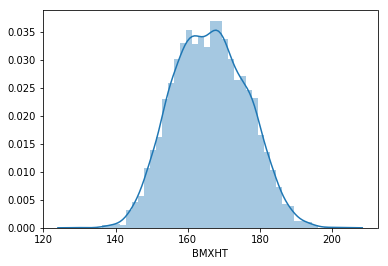

In [15]:
sns.distplot(da["BMXHT"].dropna())

__Q3a.__ Use the `bins` argument to [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) to produce histograms with different numbers of bins.  Assess whether the default value for this argument gives a meaningful result, and comment on what happens as the number of bins grows excessively large or excessively small. 

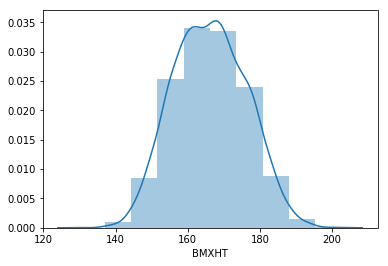

In [16]:
sns.distplot(da.BMXHT.dropna(),bins=10)

__Q3b.__ Make separate histograms for the heights of women and men, then make a side-by-side boxplot showing the heights of women and men.

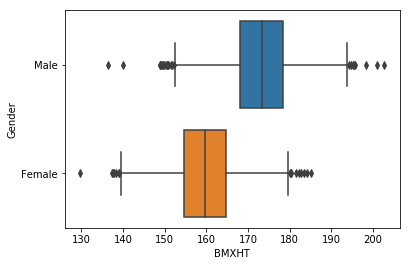

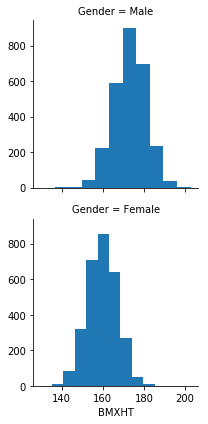

In [17]:
#sns.distplot(da[da["Gender"] == "Female"].BMXHT.dropna(),bins=10)
#sns.distplot(da[da["Gender"] == "Male"].BMXHT.dropna(),bins=10)
sns.boxplot(x = da["BMXHT"], y = da["Gender"])

g = sns.FacetGrid(da, row = "Gender")
g = g.map(plt.hist, "BMXHT")

plt.show()

__Q3c.__ Comment on what features, if any are not represented clearly in the boxplots, and what features, if any, are easier to see in the boxplots than in the histograms.

## Question 4

Make a boxplot showing the distribution of within-subject differences between the first and second systolic blood pressure measurents ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1) and [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2)).

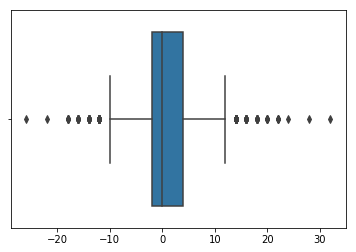

In [18]:
sns.boxplot(da["BPXSY1"]-da["BPXSY2"])
plt.show()

__Q4a.__ What proportion of the subjects have a lower SBP on the second reading compared to the first?

In [19]:
q4 = (da.BPXSY2 - da.BPXSY1).dropna()
q4 = q4 > 0
round(np.mean(q4),2)

0.36

__Q4b.__ Make side-by-side boxplots of the two systolic blood pressure variables.

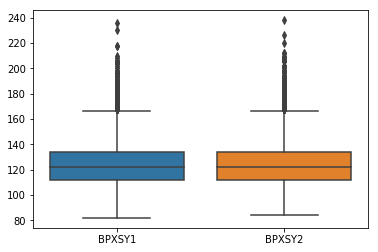

In [20]:
sns.boxplot(data = da.loc[:,["BPXSY1","BPXSY2"]])
plt.show()

## Question 5

Construct a frequency table of household sizes for people within each educational attainment category (the relevant variable is [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2)).  Convert the frequencies to proportions.

In [21]:
da["HHS"] = da.DMDHHSIZ
da["ED"] = da.DMDEDUC2.replace({1: "1 = <9", 2: "2 = 9-11", 3: "3 = HS/GED", 
                                4: "4 = Some coll/AA", 5: "5 = :College", 
                                       7: "Refused", 9: "Don't know"})

q5 = da.loc [~da.ED.isin(["Don't know","Refused"]),:]
q5 = q5.groupby("HHS")["ED"].value_counts()
q5 = q5.unstack()
q5 = q5.apply(lambda x: x/x.sum(), axis=1)
q5 = round(q5,3)
q5

ED,1 = <9,2 = 9-11,3 = HS/GED,4 = Some coll/AA,5 = :College
HHS,,,,,
1,0.094,0.098,0.236,0.319,0.254
2,0.097,0.094,0.211,0.286,0.312
3,0.098,0.107,0.207,0.319,0.270
4,0.099,0.112,0.219,0.312,0.258
5,0.149,0.145,0.200,0.305,0.200
6,0.206,0.212,0.227,0.238,0.116
7,0.258,0.167,0.246,0.222,0.106


__Q5a.__ Comment on any major differences among the distributions.

__Q5b.__ Restrict the sample to people between 30 and 40 years of age.  Then calculate the median household size for women and men within each level of educational attainment.

In [22]:
q5b = da.groupby(["Gender","Age_grp","ED"])["HHS"].median().unstack()
q5b


,ED,1 = <9,2 = 9-11,3 = HS/GED,4 = Some coll/AA,5 = :College
Gender,Age_grp,,,,,
Female,"(30, 40]",5,5,5,4,4
Male,"(30, 40]",5,5,4,4,3


## Question 6

The participants can be clustered into "maked variance units" (MVU) based on every combination of the variables [SDMVSTRA](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVSTRA) and [SDMVPSU](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVPSU).  Calculate the mean age ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)), and BMI ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)) for each gender ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)), within each MVU, and report the ratio between the largest and smallest mean (e.g. for height) across the MVUs.

In [23]:
MVU = da.groupby(["SDMVPSU","SDMVSTRA","Gender"])["RIDAGEYR","BMXHT","BMXBMI"].mean()
MVU = MVU.unstack()
MVU = round(MVU,2) 
MVU

RIDAGEYR          BMXHT         BMXBMI       
Gender             Female   Male  Female    Male Female   Male
SDMVPSU SDMVSTRA                                              
1       119         47.66  47.86  159.57  172.74  30.05  26.96
        120         43.64  43.13  155.40  169.54  32.42  30.94
        121         44.40  46.75  158.87  172.18  30.86  29.42
        122         42.90  44.65  161.32  174.00  29.45  28.53
        123         44.84  47.83  162.06  174.32  29.91  29.23
        124         51.66  50.75  158.79  172.11  29.53  28.61
        125         50.90  55.17  160.76  173.63  30.39  29.73
        126         46.23  48.42  160.39  175.15  31.26  29.03
        127         49.69  53.14  157.42  171.55  32.19  31.06
        128         55.64  53.67  156.34  169.32  32.30  31.75
        129         45.33  43.92  156.90  171.09  29.02  26.49
        130         47.81  50.52  161.98  176.97  30.70  30.34
        131         54.89  53.14  161.99  175.61  30.06  28.26
        132         43.21  42.38  161.51  172.53  29.85  28.55
        133         45.11  44.05  158.30  171.51  27.96  27.50
2       119         52.99  54.36  159.24  172.91  27.85  27.16
        120         43.74  45.22  159.22  173.08  27.40  27.73
        121         44.38  42.06  160.23  174.76  26.47  26.27
        122         47.33  44.32  157.23  170.33  26.61  25.74
        123         46.46  52.13  160.48  174.45  30.64  28.81
        124         42.54  48.25  162.85  174.29  28.64  27.71
        125         51.66  49.71  160.02  174.46  28.56  29.14
        126         47.21  48.67  160.89  174.71  29.61  29.04
        127         51.49  54.07  159.02  173.37  30.77  30.56
        128         45.59  45.82  160.44  172.40  27.49  26.84
        129         43.50  45.78  161.03  173.14  29.43  28.96
        130         50.83  50.54  160.06  175.06  31.49  29.24
        131         45.00  46.78  161.67  175.09  32.98  30.08
        132         51.70  49.04  159.14  172.81  30.54  28.97
        133         47.06  47.49  158.63  171.18  29.00  27.97

In [24]:
MVU_Max_Min = da.groupby(["SDMVPSU","SDMVSTRA","Gender"])["BMXHT"].max()
MVU_Max_Min = MVU_Max_Min / da.groupby(["SDMVPSU","SDMVSTRA","Gender"])["BMXHT"].min()
MVU_Max_Min = MVU_Max_Min.unstack()
MVU_Max_Min = round(MVU_Max_Min,2)
MVU_Max_Min

Gender            Female  Male
SDMVPSU SDMVSTRA              
1       119         1.22  1.23
        120         1.25  1.30
        121         1.31  1.25
        122         1.23  1.24
        123         1.26  1.21
        124         1.26  1.21
        125         1.23  1.27
        126         1.22  1.22
        127         1.23  1.22
        128         1.28  1.36
        129         1.35  1.21
        130         1.23  1.22
        131         1.22  1.20
        132         1.20  1.27
        133         1.27  1.27
2       119         1.27  1.27
        120         1.30  1.27
        121         1.25  1.30
        122         1.21  1.27
        123         1.24  1.29
        124         1.22  1.20
        125         1.25  1.23
        126         1.22  1.24
        127         1.27  1.22
        128         1.22  1.27
        129         1.25  1.25
        130         1.29  1.26
        131         1.20  1.20
        132         1.28  1.29
        133         1.20  1.37

__Q6b.__ Calculate the inter-quartile range (IQR) for age, height, and BMI for each gender and each MVU.  Report the ratio between the largest and smalles IQR across the MVUs.

In [25]:
from scipy.stats import iqr

print("\nAGGREGATE IQR")
print("RIDAGEYR IQR: ", iqr(da.RIDAGEYR.dropna()))
print("BMXHT IQR: ", iqr(da.BMXHT.dropna()))
print("BMXBMI IQR: ", iqr(da.BMXBMI.dropna()))

print("\nMALE IQR")
print("RIDAGEYR: ", iqr(da.RIDAGEYR.dropna()[da.RIAGENDR == 1]))
print("BMXHT: ", iqr(da.BMXHT.dropna()[da.RIAGENDR == 1]))
print("BMXBMI: ", iqr(da.BMXBMI.dropna()[da.RIAGENDR == 1]))

print("\nFEMALE IQR")
print("RIDAGEYR: ", iqr(da.RIDAGEYR.dropna()[da.RIAGENDR == 2]))
print("BMXHT: ", iqr(da.BMXHT.dropna()[da.RIAGENDR == 2]))
print("BMXBMI: ", iqr(da.BMXBMI.dropna()[da.RIAGENDR == 2]))

RIDAGEYRGrp = da[da.RIDAGEYR.notna()].groupby(['SDMVSTRA', 'SDMVPSU'])
print("\nRIDAGEYR GROUPED")
print(RIDAGEYRGrp["RIDAGEYR"].agg(iqr))

BMXHTGrp = da[da.BMXHT.notna()].groupby(['SDMVSTRA', 'SDMVPSU'])
print("\nBMXHT GROUPED")
print(BMXHTGrp["BMXHT"].agg(iqr))

BMXBMIGrp = da[da.BMXBMI.notna()].groupby(['SDMVSTRA', 'SDMVPSU'])
print("\nBMXBMI GROUPED")
print(BMXBMIGrp["BMXBMI"].agg(iqr))


print("\nRatio of Max/Min for RIDAGEYR")
print(max(RIDAGEYRGrp["RIDAGEYR"].agg(iqr)) / min(RIDAGEYRGrp["RIDAGEYR"].agg(iqr)))

print("\nRatio of Max/Min for BMXBHT")
print(max(BMXHTGrp["BMXHT"].agg(iqr)) / min(BMXHTGrp["BMXHT"].agg(iqr)))

print("\nRatio of Max/Min for BMXBMI")
print(max(BMXBMIGrp["BMXBMI"].agg(iqr)) / min(BMXBMIGrp["BMXBMI"].agg(iqr)))


AGGREGATE IQR
RIDAGEYR IQR:  31.0
BMXHT IQR:  14.800000000000011
BMXBMI IQR:  8.7

MALE IQR
RIDAGEYR:  31.0
BMXHT:  10.400000000000006
BMXBMI:  7.575000000000003

FEMALE IQR
RIDAGEYR:  30.0
BMXHT:  10.100000000000023
BMXBMI:  10.0

RIDAGEYR GROUPED
SDMVSTRA  SDMVPSU
119       1          31.25
          2          33.00
120       1          26.00
          2          27.00
121       1          31.50
          2          25.00
122       1          27.00
          2          28.75
123       1          30.00
          2          33.00
124       1          30.00
          2          26.00
125       1          29.50
          2          33.75
126       1          33.00
          2          32.50
127       1          29.00
          2          27.75
128       1          30.00
          2          24.00
129       1          22.25
          2          28.75
130       1          35.25
          2          29.00
131       1          36.00
          2          27.00
132       1          25.00
   